<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library-Import-&amp;-Settings" data-toc-modified-id="Library-Import-&amp;-Settings-1">Library Import &amp; Settings</a></span></li><li><span><a href="#Load-Data-into-Pandas" data-toc-modified-id="Load-Data-into-Pandas-2">Load Data into Pandas</a></span></li><li><span><a href="#Basic-Properties-of-the-Dataset" data-toc-modified-id="Basic-Properties-of-the-Dataset-3">Basic Properties of the Dataset</a></span></li><li><span><a href="#Exploring-Column-Summaries" data-toc-modified-id="Exploring-Column-Summaries-4">Exploring Column Summaries</a></span><ul class="toc-item"><li><span><a href="#Summary-for-Categorical-Features" data-toc-modified-id="Summary-for-Categorical-Features-4.1">Summary for Categorical Features</a></span></li><li><span><a href="#Summary-for-Numerical-Features" data-toc-modified-id="Summary-for-Numerical-Features-4.2">Summary for Numerical Features</a></span></li></ul></li><li><span><a href="#Exploring-Text-Categories" data-toc-modified-id="Exploring-Text-Categories-5">Exploring Text Categories</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Frequency-Distributions" data-toc-modified-id="Visualizing-Frequency-Distributions-5.1">Visualizing Frequency Distributions</a></span></li></ul></li><li><span><a href="#Exploring-Word-Frequencies" data-toc-modified-id="Exploring-Word-Frequencies-6">Exploring Word Frequencies</a></span><ul class="toc-item"><li><span><a href="#Creating-a-List-of-Tokens-from-a-List-of-Documents" data-toc-modified-id="Creating-a-List-of-Tokens-from-a-List-of-Documents-6.1">Creating a List of Tokens from a List of Documents</a></span></li><li><span><a href="#Counting-Frequencies-with-a-Counter" data-toc-modified-id="Counting-Frequencies-with-a-Counter-6.2">Counting Frequencies with a Counter</a></span></li><li><span><a href="#Using-Word-Clouds" data-toc-modified-id="Using-Word-Clouds-6.3">Using Word Clouds</a></span></li></ul></li><li><span><a href="#Exploring-Text-Complexity" data-toc-modified-id="Exploring-Text-Complexity-7">Exploring Text Complexity</a></span></li></ul></div>

# Modern Text Mining with Python (Part 2 of 5):<br>Data Exploration with Pandas

This notebook contains the code examples for the blog post on [Medium.com](https://medium.com/@datanizing/modern-text-mining-with-python-part-2-of-5-data-exploration-with-pandas-ee3456cf6a4?source=friends_link&sk=15387fd5091b35359cef54af3ad7ae6f).

To get it running, you will need the SQLite Database `selfposts.db`, which was created in the first notebook of this series.

## Library Import & Settings

In [1]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [3]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

## Load Data into Pandas

In [9]:
import sqlite3

sql = """
SELECT p.*, 
       c.text as plaintext, c.user_location as location
FROM posts_nlp p, categories c
WHERE p.user_name = c.user_name
"""

with sqlite3.connect('selfposts.db') as con:
    df = pd.read_sql_query(sql, con)

## Basic Properties of the Dataset

In [10]:
# list column names and datatypes
df.dtypes

index                  int64  
user_name              object 
user_location          object 
user_description       object 
user_created           object 
user_followers         int64  
user_friends           int64  
user_favourites        int64  
user_verified          int64  
date                   object 
text                   object 
hashtags               object 
source                 object 
is_retweet             int64  
selftext_clean         object 
selftext_lemma         object 
selftext_nouns         object 
selftext_adjectives    object 
selftext_verbs         object 
selftext_nav           object 
no_tokens              float64
plaintext              object 
location               object 
dtype: object

In [33]:
# select a sample of some data frame columns
df[['user_name', 'user_location', 'user_description', 'selftext_clean','hashtags']] \
  .sample(2, random_state=42)

,user_name,user_location,user_description,selftext_clean,hashtags
618045,covidnews.ch,Switzerland,"Coronavirus Statistics, Information & News",#CoronaInfoCH #COVID19 #corona #uk \nCoronavirus: 45 more cases confirmed in ‘...\n,"['CoronaInfoCH', 'COVID19', 'corona', 'uk']"
452608,Musafir Namah,"New York, US & Delhi, India","Latest tourism news, views, policy, information, travel tips, inspiration and ideas about India and all that is Indian globally.","#CoronaVirusus Washington mayor says visitors from 27 “high-risk” states must quarantine for two weeks, reports AFP…",['CoronaVirusus']


In [12]:
# length of a dataframe
len(df)

732530

In [13]:
# number of values per column
df.count()

index                  732530
user_name              732530
user_location          578687
user_description       716456
user_created           732530
user_followers         732530
user_friends           732530
user_favourites        732530
user_verified          732530
date                   732530
text                   732530
hashtags               524971
source                 732478
is_retweet             732530
selftext_clean         732530
selftext_lemma         732530
selftext_nouns         732530
selftext_adjectives    732530
selftext_verbs         732530
selftext_nav           732530
no_tokens              732530
plaintext              732530
location               578687
dtype: int64

In [14]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732530 entries, 0 to 732529
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                732530 non-null  int64  
 1   user_name            732530 non-null  object 
 2   user_location        578687 non-null  object 
 3   user_description     716456 non-null  object 
 4   user_created         732530 non-null  object 
 5   user_followers       732530 non-null  int64  
 6   user_friends         732530 non-null  int64  
 7   user_favourites      732530 non-null  int64  
 8   user_verified        732530 non-null  int64  
 9   date                 732530 non-null  object 
 10  text                 732530 non-null  object 
 11  hashtags             524971 non-null  object 
 12  source               732478 non-null  object 
 13  is_retweet           732530 non-null  int64  
 14  selftext_clean       732530 non-null  object 
 15  selftext_lemma   

## Exploring Column Summaries

The pandas `describe` method computes statistical summaries for each of the columns of a dataframe. The results are different for categorical and numerical features.

### Summary for Categorical Features

In [15]:
columns = [col for col in df.columns if not col.startswith('self')]
columns

['index',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'is_retweet',
 'no_tokens',
 'plaintext',
 'location']

In [25]:
# describe categorical columns of type np.object 
df[['plaintext', 'user_location', 'user_name','user_description','hashtags','source']] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
plaintext,732530,74312,ALERT: Mark Meadows 'not optimistic' on coronavirus relief deal any\ntime soon - Global Pandemic News | #Coronavirus… https://t.co/y1g6eUkUiF,312
user_location,578687,14622,WORLDWIDE,98500
user_name,732530,44853,GlobalPandemic.NET,97344
user_description,716456,42690,Breaking News & Critical Information to SURVIVE the Coronavirus Outbreak / Civil Unrest,97344
hashtags,524971,23445,['COVID19'],108628
source,732478,450,Twitter Web App,187371


In [18]:
df['user_name'].value_counts()[:10]

GlobalPandemic.NET                         97344
covidnews.ch                               57121
Coronavirus Updates                        32761
Open Letters                               31329
Hindustan Times                            15625
IAM Platform                               14400
Coronavirus Updates - Alexander Higgins    12544
Paperbirds_Coronavirus                     11236
OTV                                        10000
Blood Donors India                         9801 
Name: user_name, dtype: int64

### Summary for Numerical Features

In [19]:
# describe numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,732530.00,33567.75,21429.19,0.00,15140.00,30184.00,51586.75,74435.00
user_followers,732530.00,546190.63,1882713.80,0.00,433.00,10661.00,26121.00,13892841.00
user_friends,732530.00,5201.01,10563.59,0.00,64.00,591.00,3323.00,497363.00
user_favourites,732530.00,9825.63,40543.30,0.00,2.00,149.00,3130.75,2047197.00
user_verified,732530.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
is_retweet,732530.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
no_tokens,732530.00,21.64,4.42,1.00,19.00,22.00,24.00,76.00


## Exploring Text Categories

In [23]:
# number of unique values = count distinct
df['hashtags'].nunique()

23445

In [27]:
# group by category, count distinct subreddits and posts
cat_df = df.groupby('source') \
           .agg({'hashtags': pd.Series.nunique,
                 'user_name': pd.Series.count}) \
           .rename(columns={'hashtags': 'num_hashtags',
                            'user_name': 'num_posts'}) \
           .sort_values('num_hashtags', ascending=False)
            
# show top 5 records
cat_df.head(5)

,num_hashtags,num_posts
source,,
Twitter Web App,8114,187371
Twitter for Android,6060,61164
Twitter for iPhone,5393,43169
TweetDeck,1175,57861
Hootsuite Inc.,1012,11126


In [28]:
cat_df.describe()

,num_hashtags,num_posts
count,450.00,450.00
mean,58.41,1627.73
std,545.86,11447.15
min,0.00,1.00
25%,1.00,1.00
50%,1.00,8.00
75%,4.00,64.00
max,8114.00,187371.00


### Visualizing Frequency Distributions

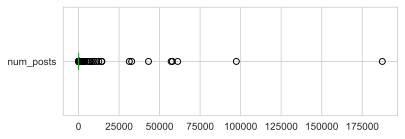

In [29]:
# horizontal boxplot of a dataframe column
cat_df[['num_posts']].plot(kind='box', vert=False, figsize=(6, 2));

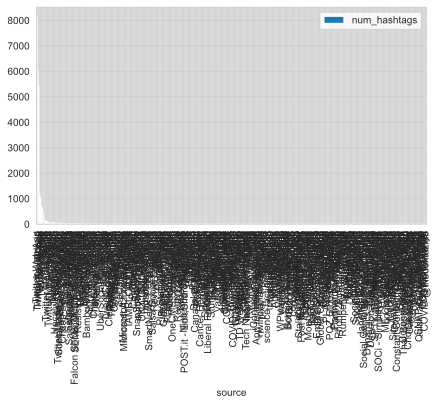

In [30]:
# bar chart of a dataframe column
cat_df[['num_hashtags']].plot(kind='bar', figsize=(7,4));

## Exploring Word Frequencies

In [32]:
# create a data frame slice
sub_df = df[df['hashtags']=='covid']

# sample cleaned text and tokens tagged as nouns
sub_df[['selftext_clean', 'selftext_nouns']].sample(2)

ValueError: a must be greater than 0 unless no samples are taken

### Creating a List of Tokens from a List of Documents

In [ ]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [ ]:
# transform list of documents into a single list of tokens
tokens = sub_df.selftext_nouns.map(my_tokenizer).sum()

In [ ]:
print(tokens[:200])

### Counting Frequencies with a Counter

In [ ]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

In [ ]:
df.category.unique()

In [ ]:
print([t[0] for t in counter.most_common(200)])   

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

In [ ]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

### Using Word Clouds

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
# create wordcloud
wordcloud(counter)

**Comparing to Sopranos**

In [ ]:
tokens2 = df[df['subreddit']=='thesopranos'].selftext_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

## Exploring Text Complexity


In [ ]:
df['no_tokens'] = df.selftext_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

In [ ]:
# mean number of tokens by category
df.groupby(['category']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [ ]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

In [ ]:
multi_boxplot(df, 'category', 'no_tokens');

In [ ]:
# print text of outliers
df['selftext_lemma'][df.no_tokens > 1500]

In [ ]:
# cut-off diagram at y=500
multi_boxplot(df, 'category', 'no_tokens', ylim=500)

In [ ]:
# comparing subreddits within a single category
multi_boxplot(df[df.category=='sex/relationships'], 
              'subreddit', 'no_tokens', ylim=700)